In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.mlab as mlab


%matplotlib inline

movies = pd.read_csv("C:\\Users\\matth_000\\Desktop\\fandango_ratings.csv")

movies.head()







,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


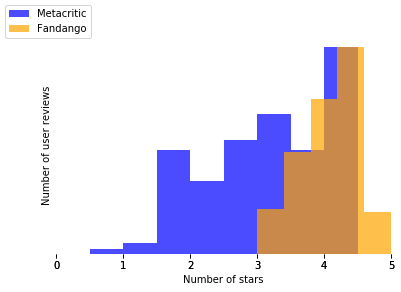

In [104]:
fig = plt.figure(frameon = False)

ax1 = fig.add_subplot(111, frameon = False, label = 'meta')
ax1 = plt.hist(movies['Metacritic_norm_round'], color = "blue", bins  = 8, label = 'Metacritic', alpha = 0.7, normed = 1)
plt.xlim(0,5)
plt.yticks([])
plt.xlabel("Number of stars")
plt.ylabel("Number of user reviews")

ax2 = fig.add_subplot(111, frameon = False, label = 'fandango')
ax2 = plt.hist(movies['Fandango_Stars'], color = 'orange', bins = 5, label = 'Fandango', alpha = 0.7, normed = 1)
plt.yticks([])
plt.xlim(0,5)




fig.legend(loc = 'upper left')
plt.show()



## About the histogram

Immediately we can see something strange is happening. Fandango has no ratings below 3 and most of the ratings are between four and five. This seems highly skewed for movie ratings. 


In [85]:
FS_mean = movies['Fandango_Stars'].mean()
FS_median = movies["Fandango_Stars"].median()
FS_std = movies["Fandango_Stars"].std()

MNR_mean = movies['Metacritic_norm_round'].mean()
MNR_median = movies["Metacritic_norm_round"].median()
MNR_std = movies["Metacritic_norm_round"].std()

print(FS_mean)
print(FS_median)
print(FS_std)

print(MNR_mean)
print(MNR_median)
print(MNR_std)



4.089041095890411
4.0
0.5403859779787333
2.9726027397260273
3.0
0.9909605613743364


## Observations

Fandango has much higher scores on average when compared to Metacritic. 

### Metacitic 

Metacritic is somewhat open with its rating methods. They take review scores from around the web and from newspapers and aggregate them using weighted averages to make a score out of 100. Reviews with letter grades go from F- (0) to A+ (100) with each increase in letter grade making a difference of about 6% in numerical grade. The four star scale works similarly.

### Fandango

Fandango no longer uses its own rating system. This is likely due to the fallout from the fivethirtyeight.com article that came out a few years ago, which pointed out that Fandango is likely inflating its movie ratings. Consequently, I was unable to find much information about their rating system. They now use RottenTomatoes' rating on their site.

### Standard deviations

The standard deviation for Fandango's ratings make sense when we look at the histogram. Out of five possible ratings, only three (3, 4, 5) have ever been picked by the site's users. As such, there is little variance in the data. 

Metacritic's standard deviation, on the other hand, is bigger because there is a lot more variance to their data.

### Means

Fandango's mean rating of 4.08 is a lot higher than Metacritic's rating of 2.97. A difference is to be expected, but this is a greater difference than one would think. If movie ratings were perfectly distributed, we would expect the mean to be around 2.5. Of course, these are almost entirely Hollywood movies with budgets of millions of dollars and some of the most popular movies would have the most reviews, so it is understandable that the average ratings are a little higher than 2.5. 

The reason Fandango's mean rating is so high is unclear from the data. Possibly, the site's users love movies more than the users of other sites love movies. Maybe Fandango doesn't let a user cast a vote that's under three stars. Or maybe Fandango is artificially inflating the movei ratings somehow.

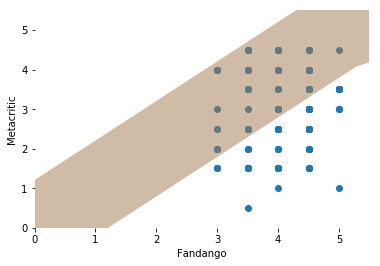

In [172]:
ax = plt.subplot(frameon = False)
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlabel("Fandango")
plt.ylabel('Metacritic')
ax.set_xlim(0,5.5)
ax.set_ylim(0,5.5)

## Line showing range of reasonable variance (within one star)
plt.plot([(0,0), (1,1), (2,2), (3,3), (4,4),(5,5), (5.5, 5.5)], linewidth = 80, alpha = 0.3)

## About the scatterplot

The wide line shows what I think is a reasonable amount of variance (about +/- 1.5 stars) along a line which would be where we would expect to see the linear regression. It looks like about half of the dots on the scatterplot are outside of the line, which indicates a lack of correlation. 

In [107]:
## find the absolute numerical difference in the ratings.

movies['fm_diff'] = abs(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])

movies.sort_values(['fm_diff'], ascending = False, inplace = True)

movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [108]:
 stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

(0.17844919073895918, 0.031161516228523815)

## Observations

The Pearson's r-value is 0.17 which is fairly low (-1 implies a strong negative correlation and +1 implies a strong positive correlation). This makes sense when we look at the scatter plot, as we can see that there is little correlation between the two movie score sites' ratings. It doesn't make sense if we didn't have that graph, though. We would think that two movie rating websites comparing the same movies with the same kind of people (people who rate movies on websites) would have a strong correlation. With that in mind, it is likely that something strange is happening here.

It also shows that not only are the scores from Fandango inflated, but they are different in some other way as well.



In [171]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
pred_3 = 3*slope + intercept
pred_1 = 1*slope + intercept
pred_5 = 5*slope + intercept

print(pred_3)
print(pred_1)
print(pred_5)

print(rvalue)
print(stderr)


2.61622452281
1.96174377224
3.27070527337
0.178449190739
0.150363940451


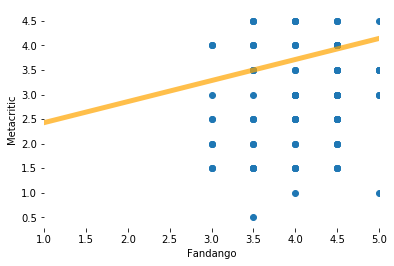

In [170]:
ax = plt.subplot(frameon = False)
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlabel("Fandango")
plt.ylabel('Metacritic')
ax.set_xlim(1,5)
# ax.set_ylim(1,5)

## Linear regression line
plt.plot([1.0, 5.0], [pred_1, pred_5], linewidth = 5, color = 'orange', alpha = 0.7)

## Linear regression

This plot is similar to the previous one, except this one has the actual linear regression. We can see there is some correlation, but not nearly as much as one would expect to find in the review of two sites reviewing the same movies. Next we'll look at how other movie sites compare.

In [115]:
list(movies.columns.values)

['FILM',
 'RottenTomatoes',
 'RottenTomatoes_User',
 'Metacritic',
 'Metacritic_User',
 'IMDB',
 'Fandango_Stars',
 'Fandango_Ratingvalue',
 'RT_norm',
 'RT_user_norm',
 'Metacritic_norm',
 'Metacritic_user_nom',
 'IMDB_norm',
 'RT_norm_round',
 'RT_user_norm_round',
 'Metacritic_norm_round',
 'Metacritic_user_norm_round',
 'IMDB_norm_round',
 'Metacritic_user_vote_count',
 'IMDB_user_vote_count',
 'Fandango_votes',
 'Fandango_Difference',
 'fm_diff']

4.2999999999999998

2.42809860167
4.14271120431
0.895297241948
0.0177735939341


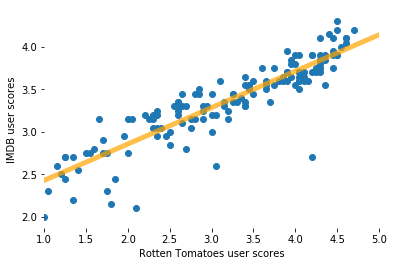

In [168]:
## IMDB vs. Rotten Tomatoes

slope, intercept, rvalue, pvalue, stderr = stats.linregress(movies['RT_user_norm'], movies['IMDB_norm'])

pred_1 = 1*slope + intercept
pred_5 = 5*slope + intercept


print(pred_1)
print(pred_5)
print(rvalue)
print(stderr)


ax = plt.subplot(frameon = False)
plt.scatter(movies['RT_user_norm'], movies['IMDB_norm'])
plt.xlabel("Rotten Tomatoes user scores")
plt.ylabel('IMDB user scores')
ax.set_xlim(1,5)
# ax.set_ylim(1,5)

## Linear regression line
plt.plot([1.0, 5.0], [pred_1, pred_5], linewidth = 5, color = 'orange', alpha = 0.7)

In [133]:
imdb_mean = movies['IMDB_norm'].mean()
imdb_median = movies["IMDB_norm"].median()
imdb_std = movies["IMDB_norm"].std()

rt_mean = movies['RT_user_norm'].mean()
rt_median = movies["RT_user_norm"].median()
rt_std = movies["RT_user_norm"].std()

print('imdb mean = ', imdb_mean)
print('imdb median = ', imdb_median )
print('imdb standard deviation = ', imdb_std, "\n")

print('Rotten Tomatoes mean = ', rt_mean)
print('Rotten Tomatoes median = ', rt_median)
print('Rotten Tomatoes standard deviation = ', rt_std)


imdb mean =  3.368493150684932
imdb median =  3.45
imdb standard deviation =  0.47936789193148144 

Rotten Tomatoes mean =  3.1938356164383572
Rotten Tomatoes median =  3.325
Rotten Tomatoes standard deviation =  1.0012215024307145


## About this plot

This is the kind of plot we expect to see when we're comparing two sites reviewing the same movies. The correlation isn't perfect, however. It looks like IMDB users rate movies a little more harshly than the users of Rotten Tomatoes. We can double check this by looking at some stats from each site:

-IMDB mean = 3.37

-IMDB median = 3.45

-IMDB standard deviation = 0.48

-Rotten Tomatoes mean = 3.19

-Rotten Tomatoes median = 3.325

-Rotten Tomatoes standard deviation = 1.00

These are a lot closer to each other than the stats of Fandango and Metacritic were to each other. 



In [164]:
stats_table = pd.DataFrame([[4.09,4.0, 0.54],
                      [2.97, 3.0, 0.99],
                      [3.37, 3.45, 0.48],
                      [3.19, 3.33, 1.00]
                     ])

stats_table.index = ["Fandango", "Metacritic","IMDB", "Rotten Tomatoes"]
stats_table.rename(index=str, columns={0: "Mean", 1: "Median", 2: "STD"}, inplace = True)
stats_table

,Mean,Median,STD
Fandango,4.09,4.00,0.54
Metacritic,2.97,3.00,0.99
IMDB,3.37,3.45,0.48
Rotten Tomatoes,3.19,3.33,1.00


In [157]:
## Next we'll find out more about the movies with the biggest disparities in their scores.
## The dataframe is still organized by biggest disparities
## I'll instead make a new column of the absolute difference between RT_user_norm and Fandango_Ratingvalue as it's not 
##totally fair to compare critics with users, especially if we can compare users to users.

movies['frt_diff'] = abs(movies['Fandango_Ratingvalue'] - movies['RT_user_norm'])
movies.sort_values('frt_diff', ascending = False, inplace = True)

movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff,frt_diff
64,Dark Places (2015),26,33,39,7.9,6.3,4.0,3.7,1.30,1.65,...,1.5,2.0,4.0,3.0,18,9856,55,0.3,2.0,2.05
53,Hot Pursuit (2015),8,37,31,3.7,4.9,4.0,3.7,0.40,1.85,...,2.0,1.5,2.0,2.5,78,17061,2618,0.3,2.5,1.85
33,The Boy Next Door (2015),10,35,30,5.5,4.6,4.0,3.6,0.50,1.75,...,2.0,1.5,3.0,2.5,75,19658,2800,0.4,2.5,1.85
135,The Lazarus Effect (2015),14,23,31,4.9,5.2,3.0,3.0,0.70,1.15,...,1.0,1.5,2.5,2.5,62,17691,1651,0.0,1.5,1.85
60,Unfinished Business (2015),11,27,32,3.8,5.4,3.5,3.2,0.55,1.35,...,1.5,1.5,2.0,2.5,39,14346,821,0.3,2.0,1.85


In [158]:
## Critics vs. user score
## Rotten tomatoes

## Critics
rtc_mean = movies['RT_norm'].mean()
rtc_median = movies["RT_norm"].median()
rtc_std = movies["RT_norm"].std()


## Users
rtu_mean = movies['RT_user_norm'].mean()
rtu_median = movies["RT_user_norm"].median()
rtu_std = movies["RT_user_norm"].std()

print('Critic mean = ', rtc_mean)
print('Critic median = ', rtc_median )
print('Critic standard deviation = ', rtc_std, "\n")

print('User mean = ', rtu_mean)
print('User median = ', rtu_median)
print('User standard deviation = ', rtu_std)


Critic mean =  3.042465753424657
Critic median =  3.175
Critic standard deviation =  1.5084399621823663 

User mean =  3.1938356164383572
User median =  3.325
User standard deviation =  1.0012215024307143


## Users vs. Critics

Understandably, the users of the site Rotten Tomatoes are more forgiving than film critics. Not by as much as one might expect, however. The mean and median are both higher for the users of the site compared to the critics, but the standard deviation of the critics' reviews was about 50% larger, meaning there was a lot more variance in the scores that critics gave. 

Also, the r-value is 0.78, indicating a close relationship. And the standard error, which shows how far each point is from the mean, is 0.08. This is lower than the standard error for Fandango vs. Metacritic (stderr of 0.15) and higher than it was for RT users vs IMDB users (stderr of 0.02). This is another indicator of variance in the data. It further proves that Fandango scores are more difficult to predict than RT or Metacritic or IMDB when we know one site's score. For example, if I know that a movie has a (normalized) user score of 3.5 on IMDB, I would guess with reasonable confidence that the scores on Metacritic and RT would be between 3 and 4. For Fandango, however, I would have to guess the score to be between 2.5 and 4.5 with the same amount of confidence.

0.45962651525
5.16889318741
0.781439628202
0.0783407779994


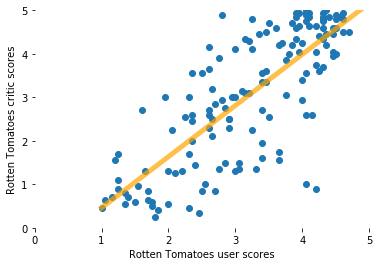

In [182]:
## Rotten Tomatoes critics vs. Rotten Tomatoes users

slope, intercept, rvalue, pvalue, stderr = stats.linregress(movies['RT_user_norm'], movies['RT_norm'])

pred_1 = 1*slope + intercept
pred_5 = 5*slope + intercept


print(pred_1)
print(pred_5)
print(rvalue)
print(stderr)


ax = plt.subplot(frameon = False)
plt.scatter(movies['RT_user_norm'], movies['RT_norm'])
plt.xlabel("Rotten Tomatoes user scores")
plt.ylabel('Rotten Tomatoes critic scores')
ax.set_xlim(0,5)
ax.set_ylim(0,5)

## Linear regression line
plt.plot([1, 5], [pred_1, pred_5], linewidth = 5, color = 'orange', alpha = 0.7)

## Why is this happening

To dive deeper into this issue, I looked up the movie with the highest disparity between RT users and Fandango users. The movie was Dark Places (2015) with a score difference of 2.05. RT users gave it 33% and Fandango users gave it 3.7 stars.

### How the ratings work

The first thing everyone needs to know about Rotten Tomatoes is that the scores they give movies are not averages. They take  review scores from critics (or users in this case) and count what percent is the equivalent of 6/10 or greater. That percentage is the movie's RT score. In the case of Dark Places, the score of 33% means that 33% of RT users gave it a positive rating. 

Fandago's user ratings work differently. The user gives the movie one, two, three, four, or five stars and the site gives that movie a score based which is the average of all its users' ratings. 

Second, on Rotten Tomatoes, a user can give a film half stars as well as whole stars. On Fandango a user can only give whole stars. As to how much of an impact this has on the scores is difficult to determine, but it likely has some effect.

Third, on RT the users tend to write longer reviews and leave their real name. It doesn't seem to be a requirement for the site, but about 99% of reviewers left their first name and last initial. The site does encourage you to sign up with Facebook though. 

On Fandango the reviews are shorter (about 2-3 sentences each) and they include a headline. Looking through the review section on the site, which now has RT critic reviews beside Fandango fan reviews, you will see that the Fandango reviews look like they could be blurbs on a poster. 

Example: 

[5 Stars]

### EXCELLENT MURDER MYSTERY

Very true to the book. Well done movie with great acting all around. Must see.

And RT:

[Fresh tomato]

August 13, 2015

The surface level generic pleasures of Dark Places and the stellar cast are entertaining.

## Closing thoughts

Whether or not its intentional, the small differences in how Fandango handles its reviews encourage users to be kinder to films. No half stars automatically means less accuracy then the other big movie sites. Shorter reviews and pseodonyms lead to less thoughtful reviews. And movie-poster-blurb style formatting encourages exitement. Everything brought together makes for an inaccurate, inflated movie review system and I hope they change it soon. 

Fandango has the highest mean and median by a lot, and the second-lowest standard deviation. So not only are the scores inflated, but there is less variation than the other sites. IMDB has the lowest standard deviation at 0.48, but its mean and median are more reasonable.

Metacritic has the lowest scores on average, but this may be because we've used critics' scores for their ratings and user scores for the other sites. 